# Getting Started

In [39]:
from hyrax import Hyrax

h = Hyrax()

In [ ]:
h.set_config("model.name", "HyraxCNN")
h.set_config("data_loader.batch_size", 4)
h.set_config("data_set.train_split", 1.0)
h.set_config("data_set.validate_split", 0.0)
h.set_config("data_set.test_split", 0.0)
h.set_config("'torch.optim.SGD'.lr", 0.001)

[2026-01-12 20:58:15,601 hyrax.config_utils:WARNING] Cannot find default_config.toml for torch.nn.CrossEntropyLoss.
[2026-01-12 20:58:15,602 hyrax.config_utils:WARNING] Cannot find default_config.toml for torch.optim.SGD.
[2026-01-12 20:58:15,602 hyrax.config_utils:WARNING] Cannot find default_config.toml for umap.UMAP.
[2026-01-12 20:58:15,610 hyrax.config_utils:WARNING] Cannot find default_config.toml for torch.nn.CrossEntropyLoss.
[2026-01-12 20:58:15,611 hyrax.config_utils:WARNING] Cannot find default_config.toml for torch.optim.SGD.
[2026-01-12 20:58:15,611 hyrax.config_utils:WARNING] Cannot find default_config.toml for umap.UMAP.
[2026-01-12 20:58:15,620 hyrax.config_utils:WARNING] Cannot find default_config.toml for torch.nn.CrossEntropyLoss.
[2026-01-12 20:58:15,620 hyrax.config_utils:WARNING] Cannot find default_config.toml for torch.optim.SGD.
[2026-01-12 20:58:15,621 hyrax.config_utils:WARNING] Cannot find default_config.toml for umap.UMAP.


In [41]:
model_inputs_definition = {
    "train": {
        "data": {
            "dataset_class": "HyraxCifarDataset",
            "data_location": "./data",
            "fields": ["image", "label"],
            "primary_id_field": "object_id",
        },
    }
}

h.set_config("model_inputs", model_inputs_definition)

[2026-01-12 20:58:16,330 hyrax.config_utils:WARNING] Cannot find default_config.toml for torch.nn.CrossEntropyLoss.
[2026-01-12 20:58:16,331 hyrax.config_utils:WARNING] Cannot find default_config.toml for torch.optim.SGD.
[2026-01-12 20:58:16,332 hyrax.config_utils:WARNING] Cannot find default_config.toml for umap.UMAP.
[2026-01-12 20:58:16,336 hyrax.config_utils:WARNING] Runtime config contains key or section 'train' which has no default defined. All configuration keys and sections must be defined in /home/drew/code/hyrax/src/hyrax/hyrax_default_config.toml


In [42]:
trained_model = h.train()

[2026-01-12 20:58:21,535 hyrax.models.model_registry:INFO] Setting model's self.optimizer from config: torch.optim.SGD with arguments: {'lr': 0.001, 'momentum': 0.9}.
[2026-01-12 20:58:21,535 hyrax.models.model_registry:INFO] Setting model's self.criterion from config: torch.nn.CrossEntropyLoss with default arguments.
[2026-01-12 20:58:21,536 hyrax.verbs.train:INFO] Training model: HyraxCNN
[2026-01-12 20:58:21,536 hyrax.verbs.train:INFO] Training dataset(s):
{'train': Name: data (primary dataset)
  Dataset class: HyraxCifarDataset
  Data location: ./data
  Primary ID field: object_id
  Requested fields: image, label
}
2026-01-12 20:58:21,539 ignite.distributed.auto.auto_dataloader INFO: Use data loader kwargs for dataset 'Name: data (primary': 
	{'sampler': <hyrax.pytorch_ignite.SubsetSequentialSampler object at 0x73df47d2e7a0>, 'batch_size': 128, 'shuffle': False, 'collate_fn': <bound method DataProvider.collate of Name: data (primary dataset)
  Dataset class: HyraxCifarDataset
  Dat

  0%|          | 1/235 [00:00<?, ?it/s]

  0%|          | 1/235 [00:00<?, ?it/s]

  0%|          | 1/235 [00:00<?, ?it/s]

  0%|          | 1/235 [00:00<?, ?it/s]

  0%|          | 1/235 [00:00<?, ?it/s]

  0%|          | 1/235 [00:00<?, ?it/s]

  0%|          | 1/235 [00:00<?, ?it/s]

  0%|          | 1/235 [00:00<?, ?it/s]

  0%|          | 1/235 [00:00<?, ?it/s]

  0%|          | 1/235 [00:00<?, ?it/s]

[2026-01-12 20:59:52,842 hyrax.pytorch_ignite:INFO] Total training time: 91.28[s]
2026/01/12 20:59:52 INFO mlflow.system_metrics.system_metrics_monitor: Stopping system metrics monitoring...
2026/01/12 20:59:52 INFO mlflow.system_metrics.system_metrics_monitor: Successfully terminated system metrics monitoring!
[2026-01-12 20:59:52,849 hyrax.verbs.train:INFO] Finished Training


In [43]:
model_inputs_definition["infer"] = {
    "data": {
        "dataset_class": "HyraxCifarDataset",
        "data_location": "./data",
        "fields": ["image", "object_id"],
        "primary_id_field": "object_id",
        "dataset_config": {
            "use_training_data": False,
        },
    },
}

h.config["model_inputs"] = model_inputs_definition

In [44]:
inference_results = h.infer()

[2026-01-12 21:00:20,507 hyrax.models.model_registry:INFO] Setting model's self.optimizer from config: torch.optim.SGD with arguments: {'lr': 0.001, 'momentum': 0.9}.
[2026-01-12 21:00:20,508 hyrax.models.model_registry:INFO] Setting model's self.criterion from config: torch.nn.CrossEntropyLoss with default arguments.
[2026-01-12 21:00:20,508 hyrax.verbs.infer:INFO] Inference model: HyraxCNN
[2026-01-12 21:00:20,509 hyrax.verbs.infer:INFO] Inference dataset(s):
{'train': Name: data (primary dataset)
  Dataset class: HyraxCifarDataset
  Data location: ./data
  Primary ID field: object_id
  Requested fields: image, label
, 'infer': Name: data (primary dataset)
  Dataset class: HyraxCifarDataset
  Data location: ./data
  Primary ID field: object_id
  Requested fields: image, object_id
  Dataset config:
    use_training_data: False
}
2026-01-12 21:00:20,511 ignite.distributed.auto.auto_dataloader INFO: Use data loader kwargs for dataset 'Name: data (primary': 
	{'sampler': None, 'batch_siz

  1%|1         | 1/79 [00:00<?, ?it/s]

[2026-01-12 21:00:22,323 hyrax.pytorch_ignite:INFO] Total evaluation time: 1.52[s]
[2026-01-12 21:00:22,376 hyrax.verbs.infer:INFO] Inference Complete.


In [45]:
# get the index of the maximum predicted class for all inference samples
import numpy as np

predicted_classes = np.zeros(len(inference_results))
for i in range(len(inference_results)):
    predicted_classes[i] = inference_results[i].argmax()

In [46]:
import pickle

with open("./data/cifar-10-batches-py/test_batch", "rb") as fo:
    dict = pickle.load(fo, encoding="bytes")

In [47]:
from sklearn.metrics import confusion_matrix

y_true = dict[b"labels"]
y_pred = predicted_classes.tolist()
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", cm)

correct = 0
for t, p in zip(y_true, y_pred):
    correct += t == p

print("\nAccuracy:", correct / len(y_true))

Confusion Matrix:
 [[104  79  70  61  68  79 191 110 102 136]
 [ 94  96  72  64  61 103 175 105  95 135]
 [ 91  92  74  62  58  99 193  91  90 150]
 [ 94  79  77  53  83  87 204 101  90 132]
 [ 82  85  69  77  60  97 188 115 106 121]
 [ 94  80  74  61  55  94 196 113  80 153]
 [ 81  85  78  71  55  90 180 129 108 123]
 [ 81  92  75  65  55  99 194 114 105 120]
 [ 99  80  78  50  60  93 194 110 105 131]
 [ 91  86  82  57  77  80 196 105 105 121]]

Accuracy: 0.1001


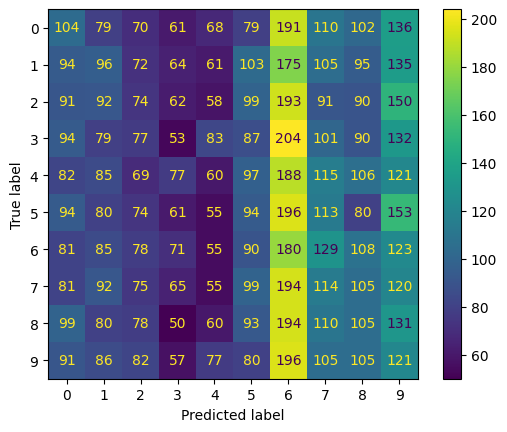

In [48]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Assuming 'cm' is the result from the previous step
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [49]:
%reload_ext tensorboard
%tensorboard --logdir {h.config['general']['results_dir']}

Reusing TensorBoard on port 6006 (pid 90452), started 4:27:58 ago. (Use '!kill 90452' to kill it.)